# Otimização por Múltiplos Enxames Aplicada ao Escalonamento Dinâmico de Projetos de Software

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from dspsp_analysis import (algorithm_dataset, instance_dataset, comparison_dataset, 
                            max_event, metrics_dataset, mean_hypervolume)

%matplotlib inline

data = metrics_dataset()
instance_ids = list(data.instance.unique())
algorithm_ids = list(data.algorithm.unique())

instance_datasets = {}
for inst in instance_ids:
    ds = instance_dataset(data, inst, zero_values=True)
    instance_datasets[inst] = {alg: algorithm_dataset(ds, alg, zero_values=True) for alg in algorithm_ids}

comparison_datasets = {}
for inst in instance_ids:
    comparison_datasets[inst] = {alg: comparison_dataset(instance_datasets[inst][alg]) for alg in algorithm_ids}

for inst in instance_ids:
    min_event = min([max_event(ds) for ds in comparison_datasets[inst].values()])
    for k in comparison_datasets[inst].keys():
        comparison_datasets[inst][k] = comparison_datasets[inst][k][:min_event+1]


In [2]:
mean_hypervolume(data)

mean       std
instance            algorithm                        
ST10_DT10_E10_SK4-5 NSGAII         0.147232  0.369198
                    NSGAIIDynamic  0.139585  0.369725
                    SMPSO          0.840048  0.461308
ST10_DT10_E15_SK4-5 NSGAII         0.072742  0.261099
                    NSGAIIDynamic  0.089373  0.297751
ST10_DT10_E5_SK4-5  NSGAII         0.175602  0.384316
                    NSGAIIDynamic  0.158632  0.381376
                    SMPSO          0.890150  0.535254
ST10_DT10_E5_SK6-7  NSGAII         0.022523  0.144296
                    NSGAIIDynamic  0.034787  0.200220

In [3]:
mean_hypervolume(data).index

MultiIndex(levels=[['ST10_DT10_E10_SK4-5', 'ST10_DT10_E15_SK4-5', 'ST10_DT10_E5_SK4-5', 'ST10_DT10_E5_SK6-7'], ['NSGAII', 'NSGAIIDynamic', 'SMPSO']],
           labels=[[0, 0, 0, 1, 1, 2, 2, 2, 3, 3], [0, 1, 2, 0, 1, 0, 1, 2, 0, 1]],
           names=['instance', 'algorithm'])

In [4]:
comparison_datasets["ST10_DT10_E5_SK4-5"]["NSGAII"].tail()

,algorithm,event,hypervolume
177,NSGAII,177,0.469768
178,NSGAII,178,0.795722
179,NSGAII,179,0.895040
180,NSGAII,180,0.965737
181,NSGAII,181,0.000000


In [5]:
comparison_datasets["ST10_DT10_E5_SK4-5"]["NSGAIIDynamic"].tail()

,algorithm,event,hypervolume
177,NSGAIIDynamic,177,0.314716
178,NSGAIIDynamic,178,0.300242
179,NSGAIIDynamic,179,0.295798
180,NSGAIIDynamic,180,0.321847
181,NSGAIIDynamic,181,0.367390


In [6]:
comparison_datasets["ST10_DT10_E5_SK4-5"]["SMPSO"].tail()

,algorithm,event,hypervolume
177,SMPSO,177,0.812784
178,SMPSO,178,1.332166
179,SMPSO,179,1.236645
180,SMPSO,180,0.975271
181,SMPSO,181,1.207436


Geração dos gráficos comparativos

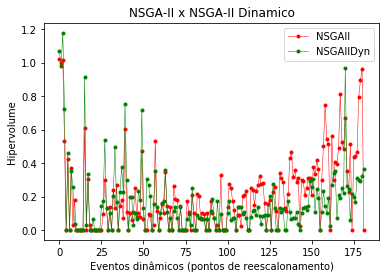

In [9]:
plt.title("NSGA-II x NSGA-II Dinamico")
plt.xlabel("Eventos dinâmicos (pontos de reescalonamento)")
plt.ylabel("Hipervolume")
plt.plot(comparison_datasets["ST10_DT10_E5_SK4-5"]["NSGAII"].event, comparison_datasets["ST10_DT10_E5_SK4-5"]["NSGAII"].hypervolume, "-ro", markersize=3, lw=.5, label="NSGAII")
plt.plot(comparison_datasets["ST10_DT10_E5_SK4-5"]["NSGAIIDynamic"].event, comparison_datasets["ST10_DT10_E5_SK4-5"]["NSGAIIDynamic"].hypervolume, "-go", markersize=3, lw=.5, label="NSGAIIDyn")
plt.legend()
plt.show()

In [ ]:
plt.title("SMPSO x SMPSO Dinamico")
plt.xlabel("Eventos dinâmicos (pontos de reescalonamento)")
plt.ylabel("Hipervolume")
plt.plot(datasets["smpso"].event, datasets["smpso"].hypervolume, "-ro", markersize=3, lw=.5, label="SMPSO")
plt.plot(datasets["smpso_dyn"].event, datasets["smpso_dyn"].hypervolume, "-go", markersize=3, lw=.5, label="SMPSODyn")
plt.legend()
plt.show()

In [ ]:
plt.title("NSGA-II x SMPSO")
plt.xlabel("Eventos dinâmicos (pontos de reescalonamento)")
plt.ylabel("Hipervolume")
plt.plot(datasets["nsgaii"].event, datasets["nsgaii"].hypervolume, "-ro", markersize=3, lw=.5, label="NSGAII")
plt.plot(datasets["smpso"].event, datasets["smpso"].hypervolume, "-go", markersize=3, lw=.5, label="SMPSO")
plt.legend()
plt.show()

In [ ]:
plt.title("NSGA-II Dinamico x SMPSO Dinamico")
plt.xlabel("Eventos dinâmicos (pontos de reescalonamento)")
plt.ylabel("Hipervolume")
plt.plot(datasets["nsgaii_dyn"].event, datasets["nsgaii_dyn"].hypervolume, "-ro", markersize=3, lw=.5, label="NSGAIIDyn")
plt.plot(datasets["smpso_dyn"].event, datasets["smpso_dyn"].hypervolume, "-go", markersize=3, lw=.5, label="SMPSODyn")
plt.legend()
plt.show()